In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import matplotlib.ticker as tk

In [ ]:
def fanningFrictionFactor(frictionFactor:float,reynolds,nPrime:float):
    return ((4.0/np.power(nPrime,0.75))*np.log10(reynolds*np.power(frictionFactor,1-(nPrime/2)))) - (0.4 / (np.power(nPrime,1.2))) - np.sqrt(1/frictionFactor)

Text(0, 0.5, 'Fanning Friction Factor, f')

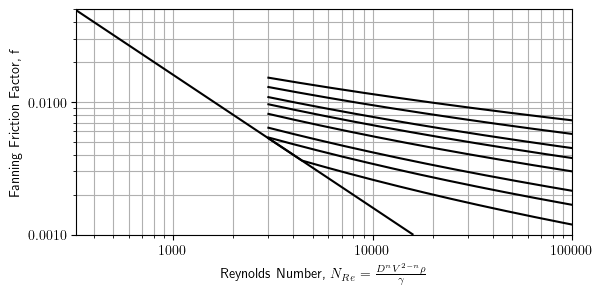

In [11]:
fig1, ax1 = plt.subplots()

turbulentReynoldsRange = np.logspace(3.477,5,1000)
laminarReynoldsRange = np.logspace(2,4.2,1000)

nRange = [2.0, 1.4, 1.0, 0.8, 0.6, 0.4, 0.3, 0.2]

#plt.rc('text', usetex=True)

for j in range(len(nRange)):
    solVec = np.zeros(np.size(turbulentReynoldsRange))
    
    for i in range(len(turbulentReynoldsRange)):
        sol = root(fanningFrictionFactor,0.001,args=(turbulentReynoldsRange[i],nRange[j])).x
        if sol < 16 / turbulentReynoldsRange[i]:
            solVec[i] = 16 / turbulentReynoldsRange[i]
        else:
            solVec[i] = sol[0]
    ax1.loglog(turbulentReynoldsRange,solVec,color='k')
    

ax1.plot(laminarReynoldsRange,16/laminarReynoldsRange,color='k')

plt.xlim((325,100000))
plt.ylim((.001,.05))

ax1.set_aspect(.666)

ax1.grid(which='both')

ax1.xaxis.set_major_formatter(tk.ScalarFormatter())
ax1.yaxis.set_major_formatter(tk.ScalarFormatter())

plt.rcParams['text.usetex'] = True

ax1.set_xlabel(r'Reynolds Number, $N_{Re} = \frac{D^{n}V^{2-n}\rho}{\gamma}$')
ax1.set_ylabel(r'Fanning Friction Factor, f')
